In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

2022-03-06 16:34:40.099180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 16:34:40.099246: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [5]:
class_names[y_train[0]]

'Coat'

2022-03-06 16:34:44.422635: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-06 16:34:44.422677: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-06 16:34:44.422702: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-03-06 16:34:44.423661: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4844 - accuracy: 0.8269 - val_loss: 0.3841 - val_accuracy: 0.8522
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3646 - accuracy: 0.8671 - val_loss: 0.3387 - val_accuracy: 0.8756
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3279 - accuracy: 0.8793 - val_loss: 0.3313 - val_accuracy: 0.8834
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3056 - accuracy: 0.8868 - val_loss: 0.3084 - val_accuracy: 0.8888
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2851 - accuracy: 0.8930 - val_loss: 0.3059 - val_accuracy: 0.8882
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2747 - accuracy: 0.8971 - val_loss: 0.3112 - val_accuracy: 0.8904
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2603 - accuracy: 0.9020 - val_loss: 0.3412 - val_accuracy:

<AxesSubplot:>

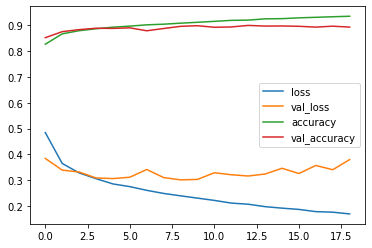

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_full.shape[1:]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

callbacks = [
    keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True,
    ),
]

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()

In [13]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

def build_model(n_hidden=1, n_neurons=30, input_shape=X_train_full.shape[1:]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Flatten())
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"],
    )
    return model

params = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
}

model_search_cv = RandomizedSearchCV(
    keras.wrappers.scikit_learn.KerasClassifier(build_model),
    params,
    n_iter=10,
    cv=3,
)
model_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)



/tmp/ipykernel_677909/2278052896.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras.wrappers.scikit_learn.KerasClassifier(build_model),


Epoch 1/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5586 - accuracy: 0.8060 - val_loss: 0.4170 - val_accuracy: 0.8584
Epoch 2/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4143 - accuracy: 0.8523 - val_loss: 0.3886 - val_accuracy: 0.8688
Epoch 3/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.3690 - accuracy: 0.8685 - val_loss: 0.3555 - val_accuracy: 0.8748
Epoch 4/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.3437 - accuracy: 0.8761 - val_loss: 0.3347 - val_accuracy: 0.8830
Epoch 5/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.3236 - accuracy: 0.8844 - val_loss: 0.3537 - val_accuracy: 0.8724
Epoch 6/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.3063 - accuracy: 0.8882 - val_loss: 0.3314 - val_accuracy: 0.8814
Epoch 7/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.2905 - accuracy: 0.8933 - val_loss: 0.3484 - val_ac

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0cb45c1ca0>,
                   param_distributions={'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [18]:
model_search_cv.best_params_

{'n_neurons': 93, 'n_hidden': 1}

In [19]:
model_search_cv.best_score_

0.8877636988957723